## Gráficas en Python con matplotlib 
---

Python tiene varias librerías populares para crear gráficos a partir de tus datos. Tal vez, la librería más común es Matplotlib. Más recientemente, se han creado otras librerías de trazado que son más "fáciles de usar", utilizando Matplotlib como base. En particular, Seaborn y Plotly son opciones comunes. 

El método `plot()` de pandas prepara la imagen con los datos, mientras que la función `show()` de `pyplot` presenta la imagen al usuario.

   a   b
0  2   4
1  3   9
2  4  16
3  5  25


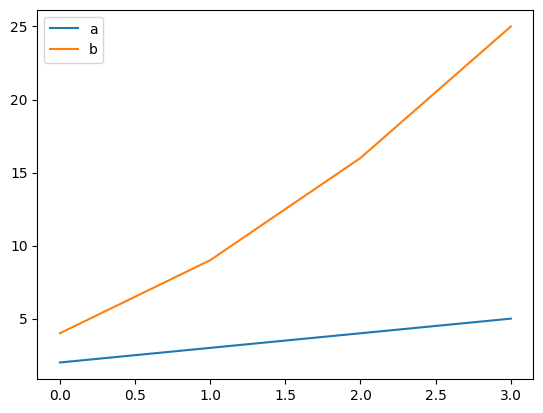

In [2]:
# Creación del gráfico 
## Importación de librerías
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

In [ ]:
## Creación del df
df = pd.DataFrame({'a':[2, 3, 4, 5], 'b':[4, 9, 16, 25]})
print(df)

## Creación e impresión del gráfico
df.plot()
plt.show()

Para almacenar la gráfica anterior en formato PNG se utiliza la función `savefig()`

### Personalización de gráficas

El método `plot()` tiene muchos parámetros adicionales que podemos usar para arreglar esto.

- Títulos `title =`
- Estilos de línea `style = `, con distintos argumentos como `o`, `x`, `o-`, `"."`
- Ejes, utilizando los distintos parámetors `x =` e `y =`
- Etiquetas de los ejes, `xlabel =` e `ylabel =`
- Límites de los ejes `xlim = [,]` e `ylim =[,]`
- Grid en el lienzo, `grid = True`
- Gestión del tamaño del gráfico `figsize = [ancho, alto]`
- Leyenda, `legend`

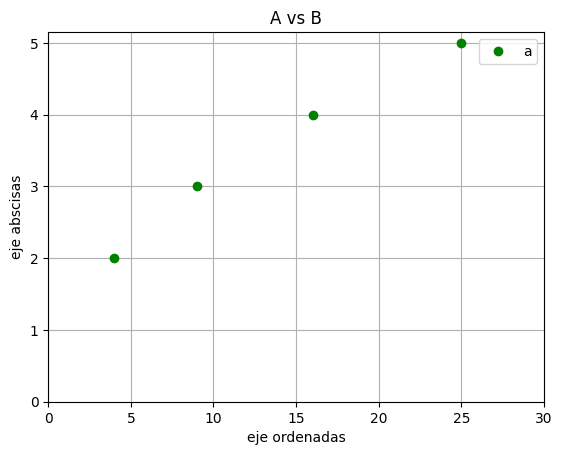

In [10]:
# Gráfico con los parámetros anteriores
## Df a graficar
df = pd.DataFrame({'a':[2, 3, 4, 5], 'b':[4, 9, 16, 25]})

## Creación del gráfico
df.plot(x='b', y='a', style='o', color = "green",
        xlim = [0, 30], ylim = 0,  # Si solo pongo un número lo tomará como el valor mínimo, en este caso 0
        xlabel = "eje ordenadas",ylabel="eje abscisas",
        title ='A vs B', grid = True)
plt.show()

### Gráficos de dispersión 

Una parte importante del análisis exploratorio de datos es desarrollar una comprensión de las relaciones entre las variables cuantitativas en nuestros datos. 

Los gráficos de dispersión son una excelente manera de visualizar y entender mejor la relación entre 2 variables.

Es importante agregar como argumento el parámetro `kind=`. Este parámetro le dice a `plot()`, ya que por defecto crea un gráfico de líneas pasando en orden por cada fila del DataFrame. En este caso, usamos el argumento `scatter` para crear un gráfico de dispersión.

En particular, los gráficos de dispersión superponen los puntos, lo que dificulta su apreciación. Para ello una buena práctica es agregar el parámetro `alpha=`, que le da transparencia a los puntos. 

### Correlación 
La tendencia de una variable a cambiar en relación con el cambio en otra variable se le llama **correlación** y existen dos tipos: la positiva y la negativa. 

En pandas, puedes calcular el coeficiente de correlación de Pearson usando el método `corr()`.

In [ ]:
## Obtener la correlación entre las dos variables
print(df['height'].corr(df['weight']))

Es necesario recordar que la correlación no puede decirnos nada sobre causa y efecto; solo sabemos que los dos factores están correlacionados, **"la correlación no implica causalidad"**. 

Si nosotros pasamos el método `corr()` sobre toda la dataframe tendremos una **matriz de correlación** con los coeficinetes de correlación entre todas las variables.

In [ ]:
## Matriz de correlacion de la df
print(df.corr())

### Matrices de dispersión 

Debido a la dificultad de visualizar la correlación entre múltiples variables, una forma efectiva de abordarlo es utilizando un gráfico de **matriz de dispersión**, que muestran las relaciones entre distintas variables agrupadas en pares. Este gráfico también es conocido ***pair plot* o matriz de gráficos de dispersión**. 

En pandas, podemos construir matrices de dispersión usando la función plotting.`scatter_matrix()`. 

In [ ]:
## Creación de la matriz de la pair plot
pd.plotting.scatter_matrix(df, figsize=(9, 9))
plt.show()

### Gráfico de líneas

Los gráficos de líneas son excelentes cuando tienes datos que **se conectan cronológicamente** y cada punto de tiempo de los datos tiene alguna dependencia con el punto anterior.

Para este caso particular, cuando queremos realizar un gráfico de líneas no es necesario especificar el argumento `kind=` como `"line"`, ya que es un valor predeterminado.

In [ ]:
# Crear un gráfico de líenas con 2 columnas
## Definir columnas a graficar
cols = ['open', 'close']

## Crear el gráfico de líneas
df.plot(x = "date", y= cols,   
        title ="Historic SBUX price", 
        xlabel = "Date", ylabel= "Share price / USD", 
        rot= 50, legend = True)

plt.show()

### Gráfico de barras
Los gráficos de barras son una gran herramienta para comparar **categorías** definidas por un valor numérico, es decir permiten comparar propiedades numéricas entre categorías.

Para visualizar estos datos en un gráfico de barras, llamamos al método `plot()` en el DataFrame y especificamos `kind='bar'` como un argumento.

In [ ]:
## Crear el gráfico de barras
df.plot(x= "year", y=["or_pop", "wa_pop"],kind="bar",  
        title="Pacific Northwest population growth",
        xlabel= "Year", ylabel= "Population (millions)")# escribe tu código aquí

plt.legend(["OR","WA"])# escribe tu código aquí
plt.show()

Como vemos en el anterior código, una manera de asignar el nombre a las etiquetas de las legendas es mediante el parámetro `plt.legend()`. 

### Histograma
Un histograma es un gráfico que muestra la frecuencia con la que aparecen diferentes valores para una variable en tu conjunto de datos. En un histograma, el eje X representa la variable y su rango de valores. El eje Y representa la frecuencia de ocurrencia para cada valor.

En un histograma, los valores se agrupan en intervalos llamados **bins o contenedores**. Esto se debe a que la variable puede asumir un rango continuo de valores, y contar y graficar cada valor único individualmente no sería práctico ni informativo. 

En pandas, hay dos formas de trazar histogramas:

1. El método `hist()`.
2. El método `plot()` con el argumento `kind='hist'`.

In [ ]:
## Método hist()
df.hist()

plt.show()

## Metodo plot() y kind=hist
df.plot(kind='hist', bins=30)

plt.show()

Si se llama a `hist()` en un DataFrame sin ningún argumento, crea un gráfico separado para cada columna numérica, este método no es compatible con el formateo de `plot()`. Usando `plot()` podemos trazar el histograma de cada variable en el mismo gráfico y Si se llama a hist() en un DataFrame sin argumentos, se creará un gráfico separado para cada columna numérica. Sin embargo, este método no es compatible con el formato de `plot()`.

Al usar `plot()`, se pueden trazar los histogramas de varias variables en un mismo gráfico, lo cual puede no ser útil. Por lo tanto, es importante seleccionar la variable específica que se desea graficar, lo que se puede hacer utilizando el parámetro column= o seleccionando directamente la columna correspondiente.eso no es útil, por lo que debemos seleccionar la variable a graficar.  Para ello utilizamos el parámetro `column=` o seleccionando la columna. 

In [ ]:
## Metodo plot() asignando la columna a graficar al parámetro column
df.hist(column='height')

plt.show()

## Metodo plot() seleccionando la columna a graficar 
df['height'].hist()

plt.show()

Es posible hacer comparaciones de histogramas para subjuntos de datos, para ello podemos filtrar y trazar los histogramas de los grupos de variable por separado en la misma gráfica. Si hacemos esto, pandas automáticamente trazará los distintos histogramas en el mismo gráfico, con el último histograma delante del primero:

In [ ]:
## Subset de datos utilizando filtros
df_20s = df[df['age'] < 30]
df_30s = df[(df['age'] >= 30) & (df['age'] < 40)]
df_40s = df[df['age'] >= 40]

## Creación de los distintos gráficos
df_20s['weight'].plot(kind="hist", bins=20, title= "Weight / lbs", ylabel= "Frequency")

df_30s['weight'].plot(kind="hist",bins=20, alpha= 0.6)

df_40s['weight'].plot(kind="hist",bins=20, alpha = 0.3)

plt.legend(["20s", "30s", "40s"])# escribe tu código aquí

plt.show()

### Caja de barras
A menudo visualizamos los cuartiles en forma de diagrama de caja y bigotes.

Lo que nos dice el diagrama de caja:

- El **valor mínimo** se encuentra al final del bigote izquierdo.
- El **primer cuartil o Q1** representa el valor del percentil 25 de la distribución de datos.
- El **segundo cuartil o Q2** representa el valor del percentil 50 de la distribución de datos, que es exactamente la mediana.
- El **tercer cuartil o Q3** representa el valor en el percentil 75 de la distribución de datos.
- El **valor máximo** se encuentra al final del bigote derecho.
- La distancia entre Q1 y Q3 se denomina intervalo intercuartílico (o IQR). Mide la dispersión de los datos situados en la mitad central. En otras palabras, es el intervalo del 50% medio de la muestra.

<Axes: >

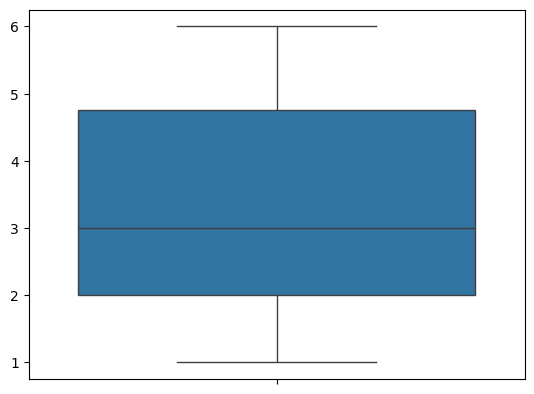

In [3]:
dataset = pd.Series([1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 5, 5, 6, 6])
sns.boxplot(dataset)